In [4]:
##imports and installs

#!pip install youtube-comment-scraper-python
from youtube_comment_scraper_python import *
import pandas as pd
#youtube.login(username="youtube username",password="youtube password")
#youtube.login_cookie(cookies=list_of_cookies)
#youtube.open("video link")

In [5]:
## add the link of the video/commnets you want to download
## name of the file you donwloading
link = input("Youtube links: ")
saved = input("Output name: ")
youtube.open(link)


Youtube links:  https://www.youtube.com/watch?v=MBo4GViDxzc
Output name:  inflation


{'status': True}

In [6]:
# wait until all the comments are scrapped then continue
response = youtube.video_comments()

Progress: 100%|████████████████████████████████████████████████████████████████████| 200.0/200 [00:20<00:00,  9.79it/s]


In [7]:
#save the response as data
data = response['body']

In [8]:
# If you want to get more data, you can do looping in your code in part of response and data like this

#all_data = []
#for i in range(0, 3): # It will scroll 10 times
#    response = youtube.video_comments()
#    data = response['body']
#    all_data.extend(data)

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
#!pip install textblob


import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import json
%matplotlib inline


from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [110]:
##save data as a DataFrame
df = pd.DataFrame(data)
df.to_csv(saved)

In [183]:
## convert comments to string andlowercase
df.Comment = df.Comment.astype(str).str.lower()
## import regeular expresion tokenizer

regexp = RegexpTokenizer('\w+')
## create a new colunm for tokenized comments
df['text_token'] =df.Comment.apply(regexp.tokenize)

# stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
#my_stopwords = ['https']
#stopwords.extend(my_stopwords)
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

## remove frequent words
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

## Create a list of all words
all_words = ' '.join([word for word in df['text_string']])

## Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

## Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)

##Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).
## Since our dataset is really small, we don’t filter out any words and set the value to greater or equal to 1 
## (otherwise there are not many words left in this particular dataset)
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
df[['Comment', 'text_token', 'text_string', 'text_string_fdist']].head()


#Next, we perfom lemmatization.
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer


wordnet_lem = WordNetLemmatizer()


df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

## Note that in some datasets, there are no words to lemmatize. We can check this as follows:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

# show level count
df.is_equal.value_counts()

all_words_lem = ' '.join([word for word in df['text_string_lem']])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## create a world cloud of the most frequent words

(-0.5, 599.5, 399.5, -0.5)

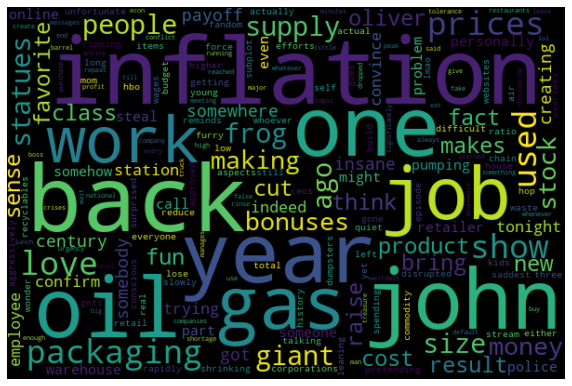

In [184]:
from wordcloud import WordCloud


wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


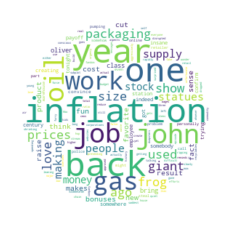

In [185]:
import numpy as np
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

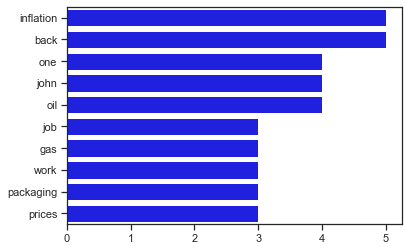

In [186]:
fd.most_common(3)

# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');


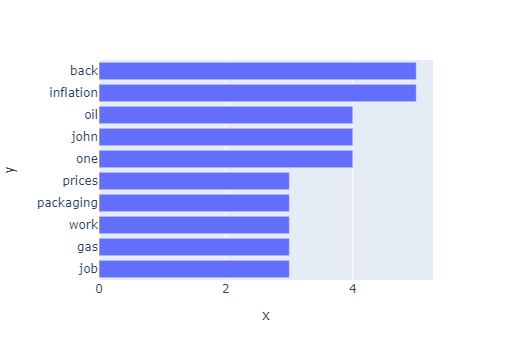

In [187]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

In [188]:
#Sentiment analysis


nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

## Initialize an object of SentimentIntensityAnalyzer with name “analyzer”:
analyzer = SentimentIntensityAnalyzer()

df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Comment,user,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,polarity,sentiment
0,"['somebody', 'somewhere', 'who', 'a', 'year', ...",Norm Rayos,"[somebody, somewhere, year, ago, insane, job, ...",somebody somewhere year ago insane job creatin...,somebody somewhere year ago insane job creatin...,somebody somewhere year ago insane job creatin...,True,0.151,0.726,0.123,-0.1280,"{'neg': 0.151, 'neu': 0.726, 'pos': 0.123, 'co...",negative
1,"['as', 'a', 'gas', 'station', 'employee', 'i',...",Jacob Windham,"[gas, station, employee, confirm, job, indeed,...",gas station employee confirm job indeed trying...,gas station employee confirm job indeed trying...,gas station employee confirm job indeed trying...,True,0.151,0.755,0.094,-0.2960,"{'neg': 0.151, 'neu': 0.755, 'pos': 0.094, 'co...",negative
2,"['i', 'work', 'for', 'an', 'online', 'retailer...",Janice Zimmerle,"[work, online, retailer, supply, warehouse, pa...",work online retailer supply warehouse part inf...,work online retailer supply warehouse part inf...,work online retailer supply warehouse part inf...,True,0.142,0.710,0.148,0.0516,"{'neg': 0.142, 'neu': 0.71, 'pos': 0.148, 'com...",positive
3,"['one', 'of', 'the', 'saddest', 'aspects', 'of...",Spheroidial Master,"[one, saddest, aspects, shrinking, product, si...",one saddest aspects shrinking product size unf...,one saddest aspects shrinking product size unf...,one saddest aspects shrinking product size unf...,True,0.291,0.709,0.000,-0.9062,"{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'comp...",negative
4,"['the', 'mom', 'talking', 'about', 'how', 'the...",Donut Chan,"[mom, talking, kids, self, conscious, spending...",mom talking kids self conscious spending remin...,mom talking kids self conscious spending remin...,mom talking kids self conscious spending remin...,True,0.251,0.749,0.000,-0.5719,"{'neg': 0.251, 'neu': 0.749, 'pos': 0.0, 'comp...",negative


In [189]:
df = pd.concat(
    [df.drop(['Likes', 'Time', 'UserLink', 'user'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

KeyError: "['Likes', 'Time', 'UserLink'] not found in axis"

In [ ]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

## Analyze data
# Tweet with highest positive sentiment

In [ ]:
df.loc[df['compound'].idxmax()].values

In [ ]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df.loc[df['compound'].idxmin()].values

In [ ]:
# Visualize data

# Number of tweets 
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );



In [ ]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

[[], [], [], [], []]


ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'pandas.core.series.Series'>

NameError: name 'ids' is not defined

C:\Users\penti\AppData\Local\Temp/ipykernel_23952/4177448429.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Commment = df.Comment.str.replace('[^ws]', '')
C:\Users\penti\AppData\Local\Temp/ipykernel_23952/4177448429.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Commment = df.Comment.str.replace('[^ws]', '')


0                                    (0.0, 1.0)
1                                    (0.0, 0.0)
2                    (0.16666666666666666, 0.3)
3    (-0.08333333333333333, 0.5333333333333333)
4    (0.15000000000000002, 0.35000000000000003)
Name: senti_score, dtype: object